## Part 1

1. use the posted Python Code file to test MNIST image data: "EE628A_autoEncoder_demo.py" 

Calculate the difference between the decoded images and the original images.

Sort the difference values and find the top-10 images with the most autoencoder errors. 
Show the top-10 images and comment on your findings (see if the images are really different from the most of the rest).

In [131]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
from keras.datasets import mnist

In [132]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


In [133]:

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


In [134]:

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


In [135]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


Note: I had to change the optimizer from 'adadelta' to 'adam' because 'adadelta' does not give me good result.

In [136]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [137]:

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [151]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0969 - val_loss: 0.0951
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0960 - val_loss: 0.0943
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0954 - val_loss: 0.0939
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0949 - val_loss: 0.0935
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0946 - val_loss: 0.0932
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0943 - val_loss: 0.0930
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0942 - val_loss: 0.0928
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0940 - val_loss: 0.0926
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0937 - val_loss: 0.0925

In [152]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

313/313 [==============================] - 0s 529us/step


In [153]:
difference = np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
    difference[i] = ((x_test[i] - decoded_images[i])**2).sum()

In [154]:
print(difference)

[ 3.90445518  9.45709038  2.06767845 ...  4.72667503  8.41113091
 12.40473747]


In [155]:
sorted_difference = np.argsort(difference)

In [156]:
top_differences = sorted_difference[-10 :]

In [157]:
top_differences

array([1984, 1758, 8254, 4230,  543, 4140, 8602, 1017, 1782, 2215])

In [158]:
# reconstructed images
reconstructed_images = [0,1,2,3,4,5,6,7,8,9]
reconstructed_topImages = np.zeros((len(reconstructed_images), decoded_images.shape[1]))

for i, j in zip(reconstructed_images, top_differences):
    reconstructed_topImages[i] = decoded_images[j]

In [159]:
# original images
images = [0,1,2,3,4,5,6,7,8,9]
original_topImages = np.zeros((len(images), x_test.shape[1]))

for i , j in zip(images, top_differences):
    original_topImages[i] = x_test[j]


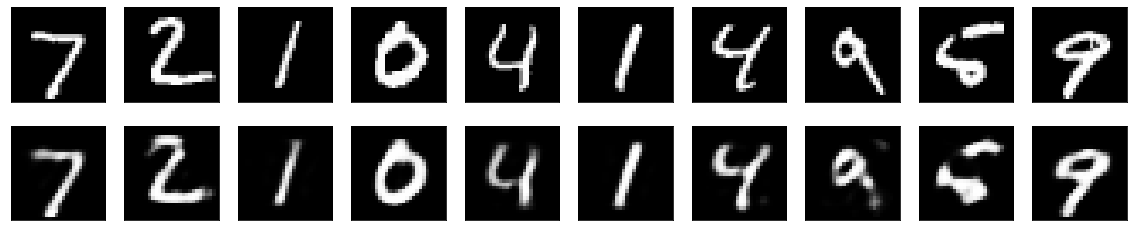

In [160]:

import matplotlib.pyplot as plt
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

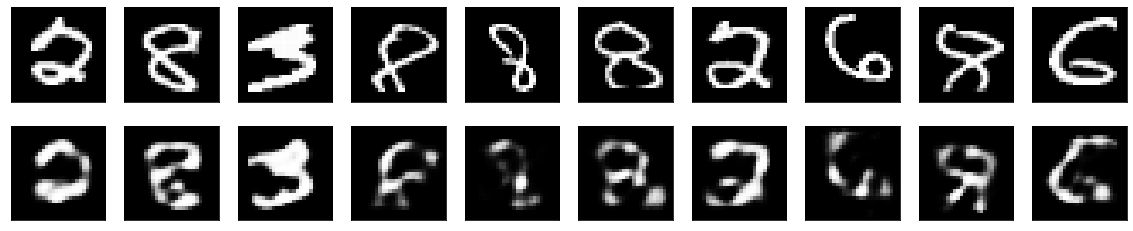

In [161]:

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    # original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(original_topImages[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_topImages[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

The autoencoder above uses the MNIST dataset. In the first subplot we can see the first ten digits of the original images against the reconstructed images. The reconstructed images depict the integer of the original picture but they are not as clear as the original.

The second subplot shows the top 10 images with the higherst reconstruction error. We can clearly see that the reconstruction quality is lower compared with the first subplot. 

## Part 2

Use data1.csv file for auto-encoder test. 

1. Use only the first 28 columns V1-V28 to test vanilla auto-encoder with 1-layer for encoder and decoder (hidden layer nodes = 2).  Plot the histogram plot of reconstruction errors. 

In [413]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [414]:
cols=[]
for i in range(28):
    cols.append(i)

In [415]:
data = np.genfromtxt('data1.csv', delimiter=',', skip_header=1, skip_footer=3, usecols=cols)

In [416]:
data = MinMaxScaler().fit_transform(data)

In [417]:
x_train, x_test = train_test_split(data, test_size=0.2)

In [418]:
x_train.shape

(227845, 28)

In [419]:
x_test.shape

(56962, 28)

In [420]:
encoding_dim = 2

In [421]:
input_image = Input(shape=(28,))
encoded = Dense(encoding_dim, activation='relu')(input_image)
decoded = Dense(28, activation='sigmoid')(encoded)

In [422]:
# map input to reconstruction
autoencoder = Model(input_image, decoded)
encoder = Model(input_image, encoded)

In [423]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [424]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [425]:
autoencoder.fit(x_train,x_train,
               batch_size=256,
               epochs=10,
               validation_data=(x_test, x_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 1s 4us/sample - loss: 0.6511 - val_loss: 0.6277
Epoch 2/10
   256/227845 [..............................] - ETA: 5s - loss: 0.6276

/home/spyros/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


227845/227845 [==============================] - 1s 3us/sample - loss: 0.6206 - val_loss: 0.6163
Epoch 3/10
227845/227845 [==============================] - 1s 2us/sample - loss: 0.6147 - val_loss: 0.6136
Epoch 4/10
227845/227845 [==============================] - 1s 2us/sample - loss: 0.6130 - val_loss: 0.6126
Epoch 5/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.6123 - val_loss: 0.6121
Epoch 6/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.6120 - val_loss: 0.6120
Epoch 7/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.6119 - val_loss: 0.6119
Epoch 8/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.6119 - val_loss: 0.6119
Epoch 9/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.6119 - val_loss: 0.6119
Epoch 10/10
227845/227845 [==============================] - 1s 2us/sample - loss: 0.6119 - val_loss: 0.6119


In [426]:
predict = autoencoder.predict(x_train)

/home/spyros/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [427]:
predict

array([[0.9582819 , 0.76722056, 0.8374199 , ..., 0.4248131 , 0.41639727,
        0.3132687 ],
       [0.9582819 , 0.76722056, 0.8374199 , ..., 0.4248131 , 0.41639727,
        0.3132687 ],
       [0.9582819 , 0.76722056, 0.8374199 , ..., 0.4248131 , 0.41639727,
        0.3132687 ],
       ...,
       [0.9582819 , 0.76722056, 0.8374199 , ..., 0.4248131 , 0.41639727,
        0.3132687 ],
       [0.9582819 , 0.76722056, 0.8374199 , ..., 0.4248131 , 0.41639727,
        0.3132687 ],
       [0.9582819 , 0.76722056, 0.8374199 , ..., 0.4248131 , 0.41639727,
        0.3132687 ]], dtype=float32)

In [428]:
difference = np.absolute(np.subtract(x_train, predict))

In [429]:
difference = difference.sum(axis=1)

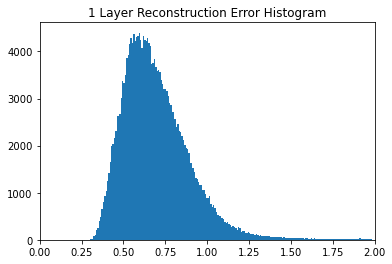

In [430]:
plt.hist(difference, bins='auto')
plt.xlim((0.0,2.0))
plt.title('1 Layer Reconstruction Error Histogram')
plt.show()

2. Use only the first 28 columns V1-V28 to test Deep auto-encoder with at least 2-layers for encoder and decoder (final hidden layer nodes = 2).  Plot the histogram plot of reconstruction errors.  Compare this with step 1 results. 

In [431]:
encoding_dim = 2

In [432]:
# input placeholder
input_image = Input(shape=(28,))
# encode
encode = Dense(10, activation='relu')(input_image)
encode = Dense(encoding_dim, activation='relu')(encode)

# decode
decode = Dense(10, activation='sigmoid')(encode)
decode = Dense(28, activation='sigmoid')(decode)


In [433]:
deep_auto_encoder = Model(input_image, decode)
deep_encoder = Model(input_image, encode)

In [434]:
encode_input = Input(shape=(encoding_dim,))
layer1Decoder = deep_auto_encoder.layers[-2]
layer2Decoder = deep_auto_encoder.layers[-1]
# create model
deep_decoder = Model(encode_input, layer2Decoder(layer1Decoder(encode_input)))

In [435]:
deep_auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [436]:
# train 
deep_auto_encoder.fit(x_train, x_train,
                     epochs=10,
                     validation_data=(x_test, x_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 4s 19us/sample - loss: 0.6125 - val_loss: 0.6115
Epoch 2/10
227845/227845 [==============================] - 4s 17us/sample - loss: 0.6114 - val_loss: 0.6114
Epoch 3/10
227845/227845 [==============================] - 4s 17us/sample - loss: 0.6114 - val_loss: 0.6114
Epoch 4/10
227845/227845 [==============================] - 4s 17us/sample - loss: 0.6114 - val_loss: 0.6114
Epoch 5/10
227845/227845 [==============================] - 4s 18us/sample - loss: 0.6114 - val_loss: 0.6114
Epoch 6/10
227845/227845 [==============================] - 4s 18us/sample - loss: 0.6114 - val_loss: 0.6114
Epoch 7/10
227845/227845 [==============================] - 4s 18us/sample - loss: 0.6114 - val_loss: 0.6114
Epoch 8/10
227845/227845 [==============================] - 4s 18us/sample - loss: 0.6113 - val_loss: 0.6114
Epoch 9/10
227845/227845 [==============================] - 4s 18us/sample - 

In [438]:
auto_encoder_prediction = deep_auto_encoder.predict(x_train)

In [412]:
x_train.shape


(60000, 784)

In [320]:
prediction.shape

(227845, 28)

In [322]:
deep_encoder_difference = np.absolute(np.subtract(x_train, auto_encoder_prediction))

In [323]:
deep_encoder_difference = deep_encoder_difference.sum(axis=1)

In [324]:
deep_encoder_difference.shape

(227845,)

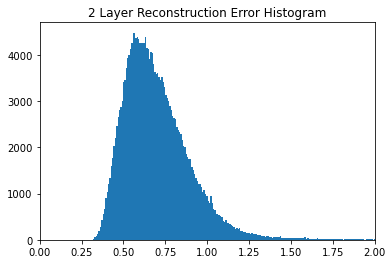

In [444]:
plt.hist(deep_encoder_difference, bins='auto')
plt.xlim((0.0, 2.0))
plt.title('2 Layer Reconstruction Error Histogram')
plt.show()

The result of a 2 layer reconstruction is very similar with the 1 layer reconstruction. 

3. For both step 1 & 2, use hidden layer nodes = 2.  Plot the scatter plots of the hidden layer vector samples. 

4. Use the column 29 "class" to put colors of the scatter plots in Step3.  "0"-class with green and "1" class with red. 

In [326]:
data = np.genfromtxt('data1.csv', delimiter=',', skip_header=1, skip_footer=3, usecols=28)

In [327]:
y_train, y_test = train_test_split(data, test_size=0.2)

In [333]:
hidden = encoder.predict(x_train)
hidden.shape

7121/7121 [==============================] - 3s 432us/step


(227845, 2)

In [335]:
deep_hidden = deep_encoder.predict(x_train)
deep_hidden.shape

7121/7121 [==============================] - 3s 445us/step


(227845, 2)

In [403]:
data.shape

(284807,)

In [441]:
hidden = hidden[:284807]

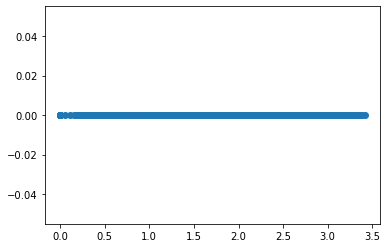

In [448]:
plt.scatter(hidden, deep_hidden)

# Part 3

In [375]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import metrics
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution

In [376]:
disable_eager_execution()

In [377]:
m = 100     # batch size
n_z = 2    # latent dimension
n_epoch = 10    # number of epochs for iterations
epsilon_std = 1.0    
original_dim = 784
intermediate_dim = 256

In [378]:
inputs = Input(batch_shape=(m, original_dim))
h_q = Dense(intermediate_dim, activation='relu')(inputs)
mu = Dense(n_z)(h_q)
logSigma = Dense(n_z)(h_q)    


In [379]:
def sample(args):
    mu, logSigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=epsilon_std)
    
    return mu + K.exp(logSigma / 2) * eps

In [380]:
z = Lambda(sample)([mu, logSigma])

decoder_hidden = Dense(intermediate_dim, activation='relu')
decoder_out = Dense(original_dim, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

In [383]:
def loss(y_true, y_pred):
   
    recon = original_dim * metrics.binary_crossentropy(y_true, y_pred)
    kl = - 0.5 * K.sum(1 + logSigma - K.square(mu) - K.exp(logSigma), axis=-1)
    
    return recon + kl

In [384]:
vae = Model(inputs, outputs)
encoder = Model(inputs, mu)
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
generator = Model(d_in, d_out)

In [385]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [386]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))    # reshape to long vector
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))        # reshape to long vector
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [388]:
vae.compile(optimizer='rmsprop', loss=loss, experimental_run_tf_function=False)
vae.fit(x_train, x_train, 
        batch_size=m, 
        epochs=n_epoch,
        shuffle=True,
        validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 188.5391 - val_loss: 172.1630
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 169.9454 - val_loss: 168.0536
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 166.6459 - val_loss: 165.4104
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 164.5718 - val_loss: 164.2123
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 163.1118 - val_loss: 162.7337
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 161.9040 - val_loss: 161.4921
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 160.8162 - val_loss: 160.3778
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 159.8176 - val_loss: 159.6063
Epoch 9/10
60000/60000 [==============================] - 2s 3

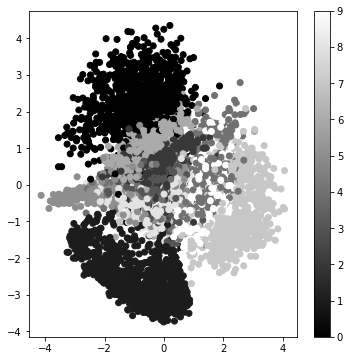

In [390]:
x_test_encoded = encoder.predict(x_test, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

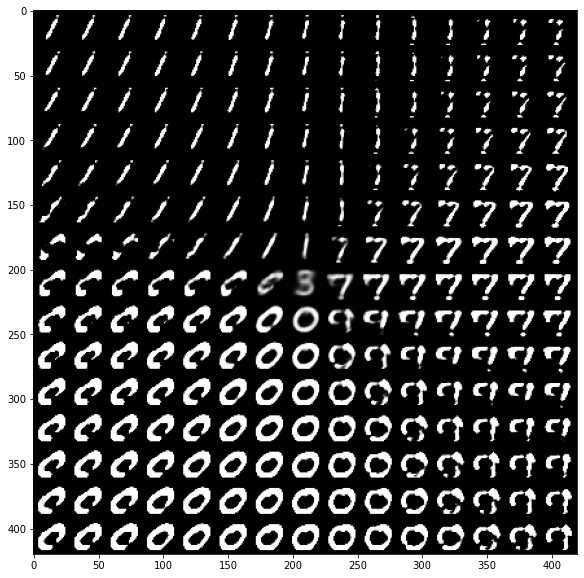

In [391]:
n = 15 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 2.0
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
        
plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [392]:
m = 100    
n_z = 2    
n_epoch = 10    
epsilon_std = 1.0 

In [396]:

inputs = Input(batch_shape=(m, 784))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(64, activation='relu')(h_q)
mu = Dense(n_z)(h_q)
logSigma = Dense(n_z)(h_q)

In [397]:
z = Lambda(sample)([mu, logSigma])

decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(784, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)


In [398]:

deep_vae = Model(inputs, outputs)

deep_encoder = Model(inputs, mu)

d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
deep_generator = Model(d_in, d_out)

In [400]:

deep_vae.compile(optimizer='rmsprop', loss=loss, experimental_run_tf_function=False)
deep_vae.fit(x_train, x_train, 
             batch_size=m, 
             epochs=n_epoch,
             shuffle=True,
             validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 183.5096 - val_loss: 169.7709
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 167.1125 - val_loss: 165.0708
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 163.3844 - val_loss: 162.4851
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 160.6010 - val_loss: 159.9440
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 158.4972 - val_loss: 157.9331
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 157.0452 - val_loss: 156.8057
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 155.9577 - val_loss: 155.6345
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 155.1034 - val_loss: 155.4923
Epoch 9/10
60000/60000 [==============================] - 3s 5

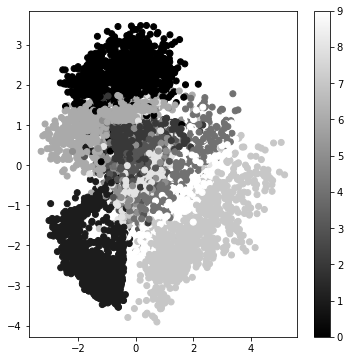

In [401]:
x_test_encoded = deep_encoder.predict(x_test, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

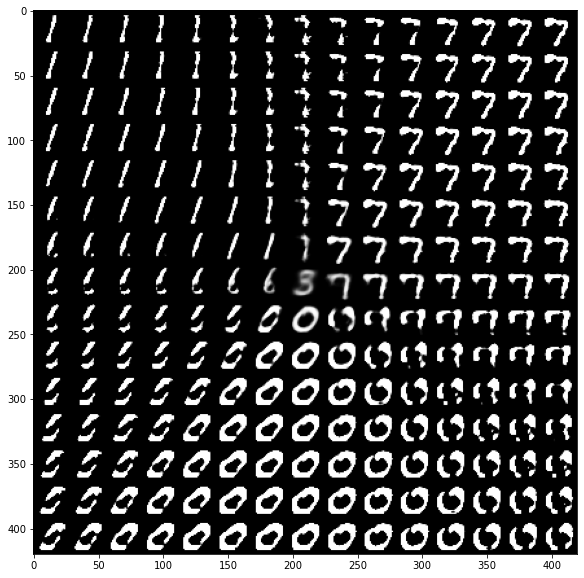

In [402]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 2.0
        x_decoded = deep_generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
        
plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

From the results we got we can see that both models give similar results. The extra hidden layer does not make a significant improvement for the model. 